<a href="https://colab.research.google.com/github/Kethellem/cursopython/blob/main/AnaliseDesconto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('supermercado.csv')
df.head(10)


Saving supermercado.csv to supermercado (1).csv


,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


In [3]:
# Contagem de categorias
df['Categoria'].value_counts()

,count
Categoria,
lacteos,447
belleza-y-cuidado-personal,239
congelados,235
verduras,64
instantaneos-y-sopas,57
comidas-preparadas,46
frutas,19


Aplicando os conceitos de estatistica:



1 - MÉDIA




In [4]:
df['Preco_Normal'].mean()

np.float64(2070.9972899728996)

Preços totais por categoria utilizando o mean

In [6]:
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3095.043478
5,lacteos,2385.219239
2,congelados,2108.042553
0,belleza-y-cuidado-personal,1783.556485
3,frutas,1724.473684
6,verduras,1343.296875
4,instantaneos-y-sopas,765.491228


MÉDIANA

In [7]:
df['Preco_Normal'].median()

1269.0

"Observa-se que na categoria Comidas Preparadas a mediana é maior que a média, o que indica uma assimetria à esquerda, ou seja, há uma concentração de preços mais altos nessa categoria."


In [2]:
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


única categoria que apresenta médiana mair que a média é comidas-preparadas


2 - DESVIO PADRÃO


"A categoria belleza-y-cuidado-personal possui o maior desvio padrão, demonstrando uma maior variação nos preços normais, o que indica uma grande diferença entre os produtos desta categoria."

In [ ]:
desvio = df.groupby('Categoria')['Preco_Normal'].std().reset_index()
desvio.columns = ['Categoria', 'Desvio_Padrao']
desvio

3 - BOXPLOT

o boxplot complementa a análise estatística, permitindo uma visualização clara da dispersão e da distribuição dos preços.

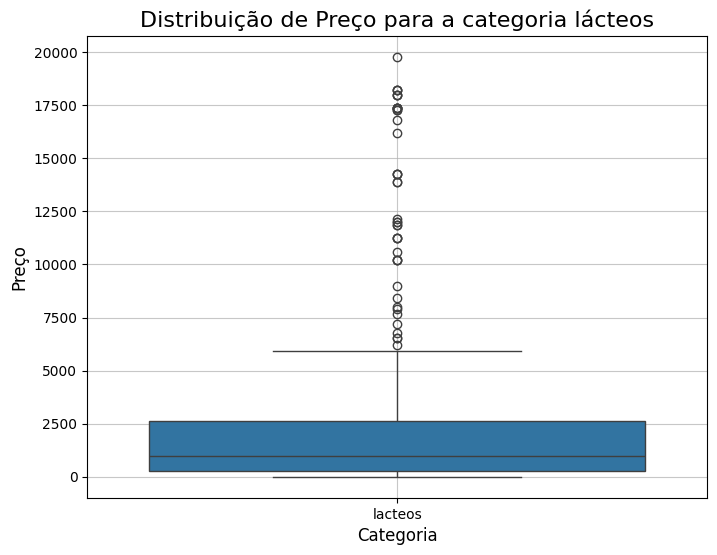

In [20]:

# Filtrando os dados da categoria 'lacteos'
# separando a categoria com o maior valor de desvio padrão
categoria_lacteos = df[df['Categoria'] == 'lacteos']


# tamanho do gráfico
plt.figure(figsize=(8, 6))

# Criando um boxplot
sns.boxplot(x='Categoria', y='Preco_Normal', data=categoria_lacteos)

# Adicionando título e rótulos
plt.title('Distribuição de Preço para a categoria lácteos', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Preço', fontsize=12)

# Adicionando grade ao gráfico
plt.grid(True, linestyle='-', alpha=0.7)
# Exibindo o gráfico
plt.show()


3 - MÉDIA DE DESCONTOS

In [22]:
df.groupby('Categoria')['Desconto'].mean().reset_index().sort_values(by='Desconto', ascending=False)

,Categoria,Desconto
2,congelados,154.029787
0,belleza-y-cuidado-personal,123.083682
1,comidas-preparadas,43.478261
5,lacteos,17.411633
3,frutas,0.000000
4,instantaneos-y-sopas,0.000000
6,verduras,0.000000


In [23]:
import plotly.express as px
import plotly.io as pio

# Configurando para funcionar no notebook (Google Colab)
pio.renderers.default = 'notebook_connected'

# Agrupando por categoria e marca, calculando a média de desconto
desc_por_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Filtrando apenas descontos maiores que zero
desc_por_categoria_marca = desc_por_categoria_marca[desc_por_categoria_marca['Desconto'] > 0]

# Criando o gráfico de treemap
fig = px.treemap(desc_por_categoria_marca,
                  path=['Categoria', 'Marca'],
                  values='Desconto',
                  title="Média de Desconto por Categoria e Marca",
                  color='Desconto',
                  color_continuous_scale='Viridis')

# Exibindo o gráfico
fig.show()

5 - GRÁFICO INTERATIVO


In [5]:
import plotly.express as px
media_desconto_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index()
fig = px.bar(media_desconto_categoria, x='Categoria', y='Desconto', title='Média de Desconto por Categoria', color='Categoria')
fig.show()
